# Lineární Regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody LSE.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

Import knihoven:

In [17]:
import numpy as np
import usu

Načtení dat:

In [18]:
npzfile = np.load('data/data_02.npz')
npzfile.files


['x0', 'x1']

Přiřazení dat do nezávislé a závislé proměnné:

In [19]:
x = npzfile['x0']
y = npzfile['x1']
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

Vykreslení dat:

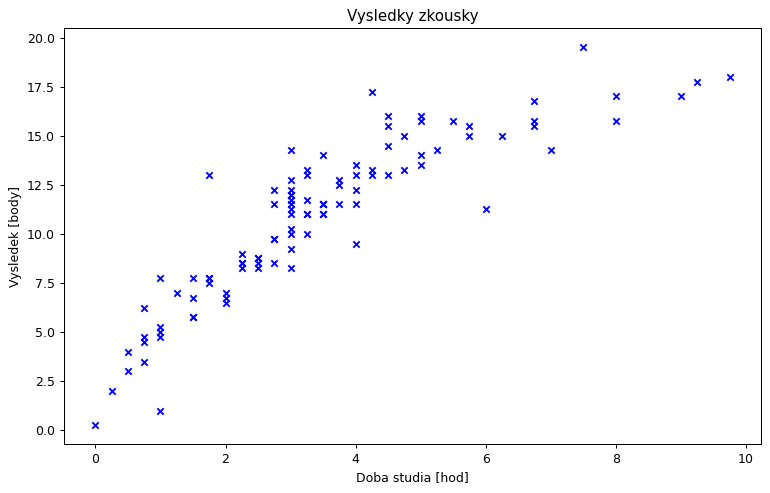

In [20]:
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")

## LSE (Least-Squares Estimation)


### Odhad parametrů $\theta$ :

$$ \theta = (\tilde{X^T} \tilde{X})^{-1} \tilde{X^T} y $$  
kde $\tilde{X}$ je rozšířená matice dat $X$ (je rozšířená o jeden sloupec s hodnotami 1)

#### Příklad matice $\tilde{X}$ pro lineární regresi:

$$
    X = 
        \begin{bmatrix}
        1 \\
        2 \\
        3\\
        \end{bmatrix} 
    \implies
        \tilde{X} = 
        \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3\\
        \end{bmatrix} 
$$


#### Příklad matice  $\tilde{X}$ pro polynomiální regresi:

* Každá vyšší mocnina $X$ je v případě PR považována za **další nezávislou proměnnou**.

$$
    X = 
        \begin{bmatrix}
        1 & 1 \\
        2 & 4 \\
        3 & 9 \\
        \end{bmatrix} 
    \implies
    \tilde{X} = 
        \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
        \end{bmatrix} 
$$


### Odhad  $\theta$ se zapojením regularizace:
$$ \theta = (\tilde{X^T} \tilde{X} + \lambda I)^{-1} \tilde{X^T} y $$  
kde $\lambda$ je koeficient regularizace (hyperparametr), $I$ je jednotková matice o rozměrech $n \times n$ ($n$ je počet sloupců matice $\tilde{X}$)

Funkce pro odhad parametrů theta:

In [21]:
def computeThetaLSE(x, y, order=1, lmbd=0):
    """
    x - vektor vstupnich hodnot (doba studia)
    y - vektor vystupnich  hodnot (zisk bodu)
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    
    """
    #################################################################
    #rozsirena matice dat
    X = np.c_[np.ones_like(x), x]
    for i in range(1, order):
        X = np.c_[X, x**i]

    n = X.shape[1]
    I = np.identity(n)
    #################################################################
    
    return np.linalg.inv(X.T @ X + lmbd * I) @ X.T @ y


Linearní regrese bez regularizace (polynom 1. řádu):

In [22]:
theta = computeThetaLSE(x, y)

Vykreslení výsledků regrese:

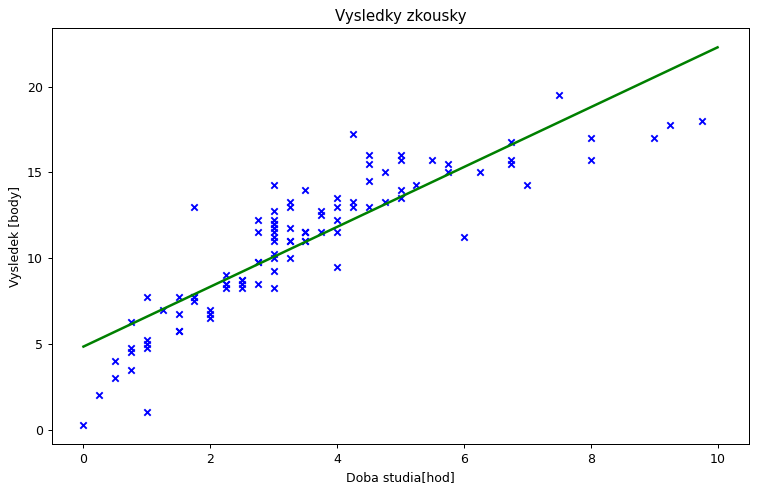

In [23]:
#vstupni paremetry do funkce usu.dra (theta, x a y) musi byt typu np.array nikoli matrix

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

x : 4.000, y : 11.824


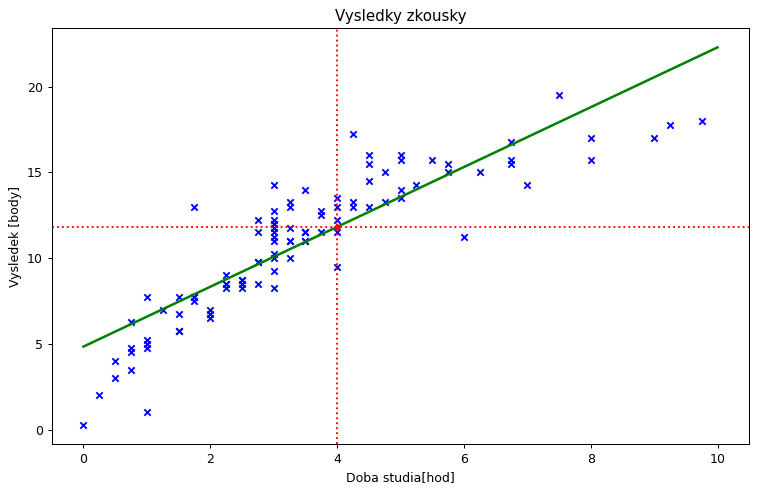

In [24]:
#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = np.array([[1, valueX]]) @ theta
usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
#################################################################


Určete předpokládanou dobu studia v případě zisku 12 bodů:

x : 4.101, y : 12.000


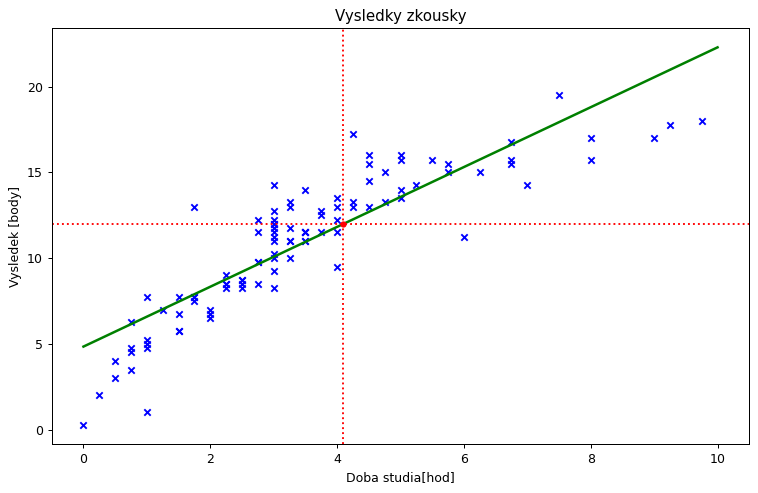

In [25]:
#################################################################
# ZDE DOPLNIT

valueY = 12

#y = theta_0 + theta_1 * x
valueX = (valueY - theta[0, 0]) / theta[1, 0]
#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Polynomiální regrese

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2 a 𝜆 1:

x : 4.000, y : 22.490


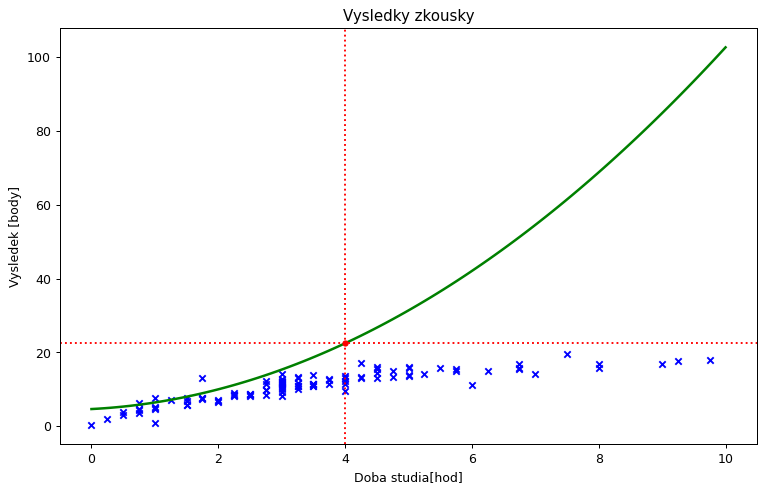

In [47]:
order = 2
lmbd = 1
theta = computeThetaLSE(x, y, order, lmbd)

#################################################################
# ZDE DOPLNIT
valueX = 4
_valueX = np.array([valueX**i for i in range(order + 1)])
valueY = _valueX @ theta
# Nejvhodnejsi rad polynomu a proc: nejvhodnejsi rad polynomu pro tuto metodu je 1, linearni, protoze nejlepe popisuje dana data. Ikdyz resenim problemu bude vzhledem k jeho charakteru spise logisticka krivka - mame omezeny pocet bodu a od urcite hranice hodin studia by mel byt vysledek prave na teto hranici.

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Exponenciální regrese

Reší se jako lineární regrese pro data s hodnotami $[x,\log{(y)}]$

In [48]:
npzfile = np.load('data/data_02_exp.npz')
npzfile.files

['x0', 'x1']

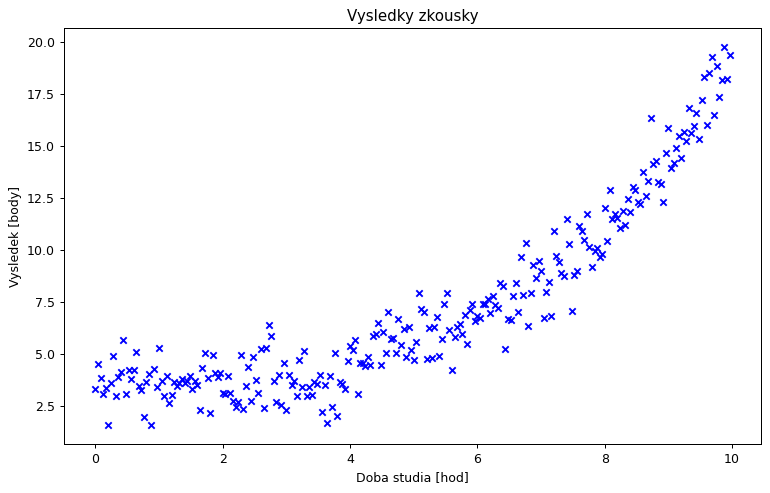

In [49]:
x_exp = npzfile['x0']
y_exp = npzfile['x1']
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


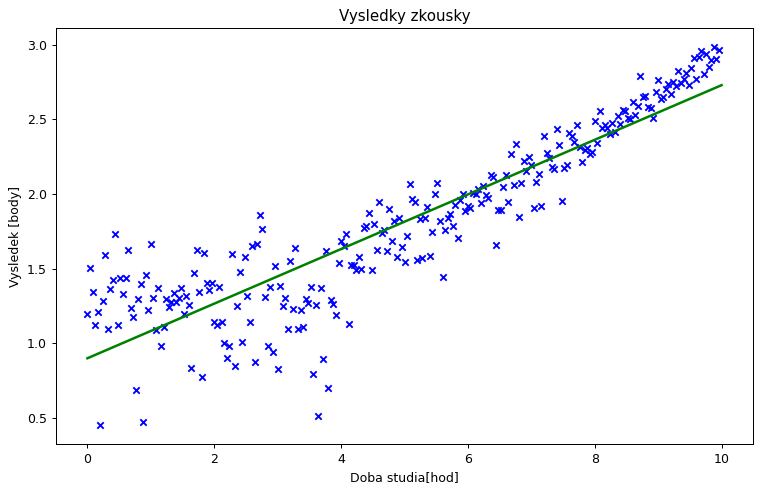

In [63]:
#################################################################
# ZDE DOPLNIT

theta = computeThetaLSE(x_exp, np.log(y_exp))
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

#################################################################


Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

4 [5.11422275]
x : 4.000, y : 1.632


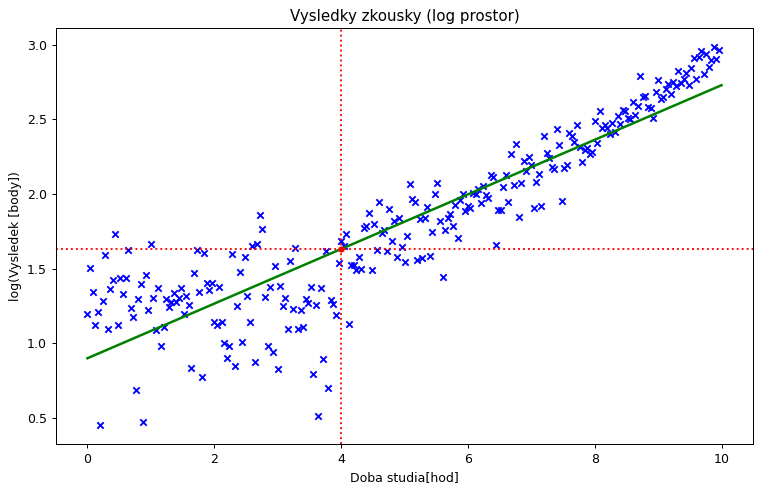

In [68]:
#################################################################
# ZDE DOPLNIT

valueX = 4
log_valueY = np.array([1, valueX]) @ theta
valueY = np.exp(log_valueY)
print(valueX, valueY)
# usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky (log prostor)", "Doba studia[hod]", "log(Vysledek [body])", theta, valueX, log_valueY)
#################################################################
